In [24]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline 


### IMPORTING THE DATASET 
The goal is to attempt to predict the outcome of the drugs that might be accurate for a patient to use. The target variable is drug type and the features we are using to predict the value of the target variable are Age, Sex, Blood Pressure Levels (BP), Cholesterol Levels, Na to Potassium Rations.

The dataset is given in the file drug200.csv.

In [25]:
#Reading the file into a pandas data frame
df = pd.read_csv("drug200.csv") 
print(df.shape)
#df
df.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [26]:
#Dropping any columns that have missing values
df1 = df.dropna()
print(df1.shape)
df1.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Mapping string values to float

In [27]:
df1["Sex"] = df1["Sex"].map({"F":0 , "M":1})
df1["BP"] = df1["BP"].map({"LOW":0 , "NORMAL":1, "HIGH":2})
df1["Cholesterol"] = df1["Cholesterol"].map({"LOW":0 , "NORMAL":1, "HIGH":2})
df1["Drug"] = df1["Drug"].map({"drugA":0 , "drugB":1, "drugC":2, "drugX":3, "DrugY":4}) 

In [28]:
df1.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,2
2,47,1,0,2,10.114,2
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4
5,22,0,1,2,8.607,3
6,49,0,1,2,16.275,4
7,41,1,0,2,11.037,2
8,60,1,1,2,15.171,4
9,43,1,0,1,19.368,4


In [29]:
#Converting the df1 data frame into a numpy array named df2 (using values method of dataframes) 
#df2 = df1.to_numpy()
df2 = df1.to_numpy()
#df3 = y.to_numpy()
print(df2.shape)
#print(df3.shape)

(200, 6)


In [30]:
#Select all rows and first 5 columns as X from df2 and select all rows and last column as Y from df2 
X = df2[:,:5]
Y = df2[:,5:]

In [31]:
# Splitting the dataset into training and test data.
# Select first 60 rows as training dataset and the remaining (140) rows as test dataset 

X_train = X[:60]
Y_train = Y[:60].ravel()
X_test = X[60:]
Y_test = Y[60:].ravel()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60, 5)
(60,)
(140, 5)
(140,)


In [34]:
np.any(np.isnan(df2))

False

In [35]:
np.all(np.isfinite(df2))

True

## SVM using Linear Kernel.

In [36]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

In [37]:
from sklearn import svm

# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    # Fit the classifier on the training set 
    
    svc_linear.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set 
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set 
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)

In [38]:
# Calling the above function i.e. svm_linear with different values of parameter 'c'.
# Starting with smaller values of 'c' like 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.483333
Test Accuracy = 0.442857
Train Accuracy = 0.750000
Test Accuracy = 0.657143
Train Accuracy = 0.750000
Test Accuracy = 0.692857
Train Accuracy = 0.783333
Test Accuracy = 0.685714
Train Accuracy = 1.000000
Test Accuracy = 0.950000
Train Accuracy = 1.000000
Test Accuracy = 0.978571


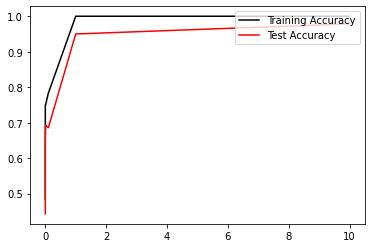

In [40]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

plt.plot(c_svm_linear, acc_train_svm_linear, c="black")
plt.plot(c_svm_linear, acc_test_svm_linear, c="red")


# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## SVM using Radial Basis Function (RBF) Kernel.

In [48]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []  

In [49]:
from sklearn import svm
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c) - 5 points
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    
    # TODO - Fit the classifier on the training set - 5 points
    
    svc_rbf.fit(X_train, Y_train)
    
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train, Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test, Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)

In [50]:
for c in cVals:
    svm_rbf(c)

Train Accuracy = 0.483333
Test Accuracy = 0.442857
Train Accuracy = 0.483333
Test Accuracy = 0.442857
Train Accuracy = 0.483333
Test Accuracy = 0.442857
Train Accuracy = 0.483333
Test Accuracy = 0.442857
Train Accuracy = 0.633333
Test Accuracy = 0.600000
Train Accuracy = 0.766667
Test Accuracy = 0.707143


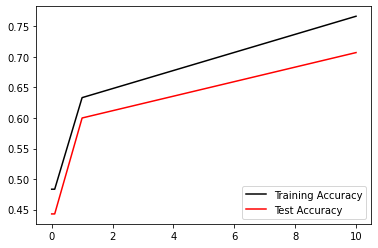

In [51]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

plt.plot(c_svm_rbf, acc_train_svm_rbf, c="black")
plt.plot(c_svm_rbf, acc_test_svm_rbf, c="red")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 60 training examples, use less (say 30).

In [52]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [56]:
def svm_polynomial(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'poly', C = c) - 5 points
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    A = X_train[0:30,:]  # First 30 rows of training set.
    B = Y_train[0:30]  
    C = X_test[0:10,:]   # First 10 rows of test set.
    D = Y_test[0:10]
    
    # TODO - Fit the classifier on the training set - 5 points
    # Use A and B to train and C and D to test.
    
    svc_polynomial.fit(A,B)
    
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_poly_train = svc_polynomial.predict(A)
    acc_train = svc_polynomial.score(A, B)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_poly_test = svc_polynomial.predict(C)
    acc_test = svc_polynomial.score(C,D)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)

In [69]:
# Calling the above function i.e. svm_poly with different values of parameter 'c'.
# Starting with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
# Redefining cVals because poly takes a long time to run with larger values of c since 
# the larger the value of c, the lesser the amount of regulatization
cVals = np.geomspace(0.000001, 0.001, 5)
for c in cVals:
    svm_polynomial(c)

Train Accuracy = 0.633333
Test Accuracy = 0.500000
Train Accuracy = 0.633333
Test Accuracy = 0.500000
Train Accuracy = 0.633333
Test Accuracy = 0.500000
Train Accuracy = 0.633333
Test Accuracy = 0.500000
Train Accuracy = 0.633333
Test Accuracy = 0.500000


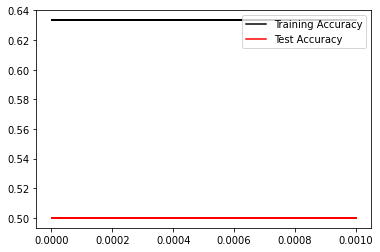

In [70]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

plt.plot(c_svm_poly, acc_train_svm_poly, c="black")
plt.plot(c_svm_poly, acc_test_svm_poly, c="red")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')